In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error



In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X=iris.data
y=iris.target
feature_names=iris.feature_names
target_names=iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## PCA

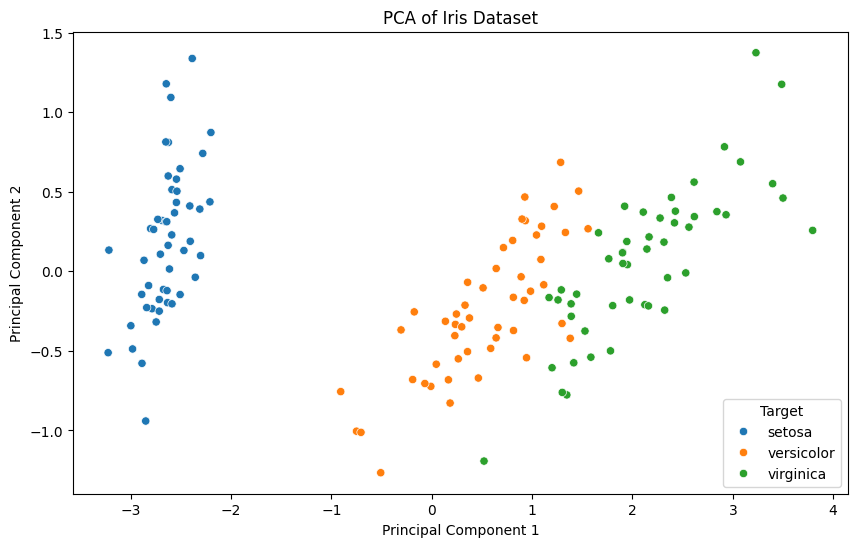

In [26]:
pca=PCA(n_components=2)
model_pca=pca.fit_transform(X)
df_pca=pd.DataFrame(data=model_pca,columns=['PC1','PC2'])
df_pca['target']=y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue=iris.target_names[y])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()


In [29]:
# ---------------------- Data Split ----------------------
X_train,X_test,y_trai,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## ---------------------- k-Nearest Neighbour ----------------------


In [34]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("KNN Accuracy:",accuracy_score(y_test,y_pred_knn))



KNN Accuracy: 0.3


## ---------------------- Linear Regression ----------------------

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


So why didn’t we use iris.target for linear regression?
Because:

Linear regression predicts continuous numbers, like lengths or weights.

iris.target is categorical, representing classes/species. It's for classification, not regression.

If you want to predict the species from features, you'd use classification methods like logistic regression or decision trees, not linear regression.

To summarize:
When predicting petal length from sepal length, target = petal length (a continuous value from iris.data).

When predicting species, target = species (iris.target), and you need classification, not regression.

Would you like me to show you how to do classification with iris.target?

Linear Regression Mean Squared Error: 0.5960765879745186


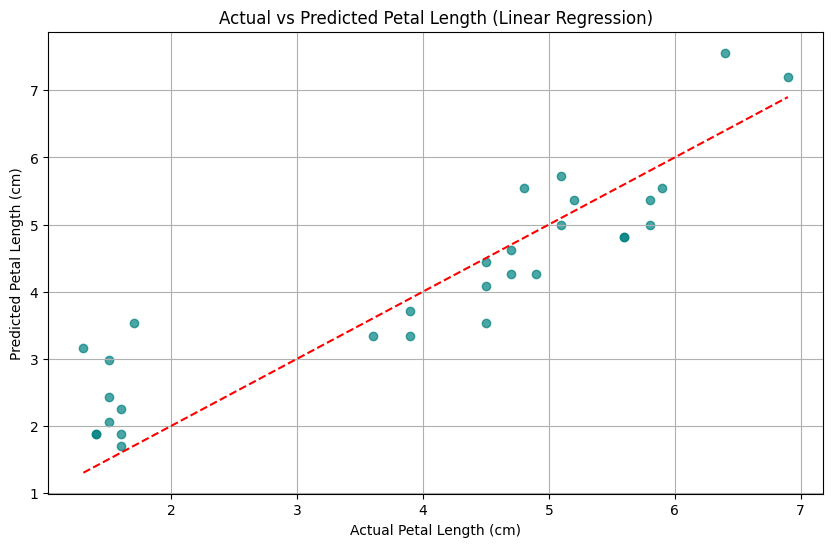

In [53]:
# Define X and y
X = df[["sepal length (cm)"]]
y = df["petal length (cm)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model=LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Petal Length (cm)")
plt.ylabel("Predicted Petal Length (cm)")
plt.title("Actual vs Predicted Petal Length (Linear Regression)")
plt.grid(True)
plt.show()


##  polynomial regression

Polynomial Regression Mean Squared Error: 0.511779132444561


e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


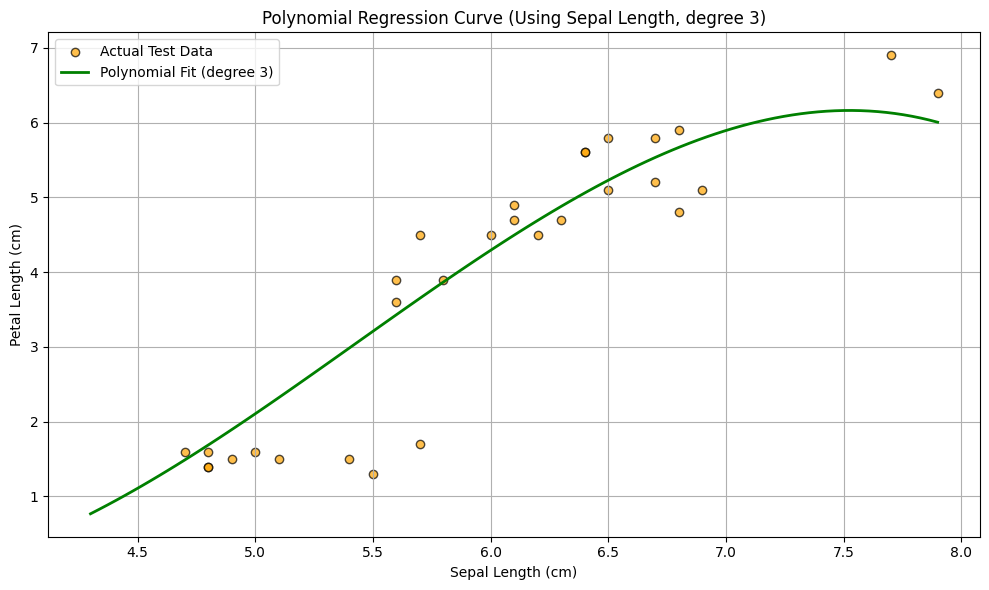

In [54]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print("Polynomial Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
# Plotting Actual vs Predicted for Polynomial Regression
# Plot actual data and polynomial curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = poly_model.predict(X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.7, color='orange', edgecolor='k', label='Actual Test Data')
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label='Polynomial Fit (degree 3)')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title(f"Polynomial Regression Curve (Using Sepal Length, degree {degree})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## decision tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier with entropy criterion to mimic ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
id3_model.fit(X_train, y_train)

# Make predictions
y_pred = id3_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of ID3 model on Iris dataset: {accuracy:.2f}")

# Optional: Visualize the decision tree
from sklearn.tree import export_text
tree_rules = export_text(id3_model, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n")
print(tree_rules)

ID3 (Decision Tree) Accuracy: 0.9777777777777777


NameError: name 'classification_report' is not defined

# ---------------------- Naive Bayes ----------------------

In [62]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9777777777777777
